In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from pathlib import Path
from analysis.datasets import *
from analysis.downloads import *
from analysis.explorative_analysis import *
import seaborn as sns

### Load the Penmanshiel 09 Data, Argument is the year

In [2]:
data_merged = load_turbine_data_dynamic(2016) # merged the data file and the status file

Attempting to load file: ..\data\zenodo_turbine_data\raw\2016\Turbine_Data_Penmanshiel_09_2016-06-24_-_2017-01-01_1049.csv


In [36]:
data_raw = load_turbine_electricity_data_dynamic(2016) # pure scada data
data_raw.loc[(data_raw.index.month == 8) & 
            (data_raw.index.year == 2016) & 
            (data_raw['Wind speed (m/s)'].isna())]

Attempting to load file: ..\data\zenodo_turbine_data\raw\2016\Turbine_Data_Penmanshiel_09_2016-06-24_-_2017-01-01_1049.csv


,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),"Wind speed Sensor 2, Standard deviation (m/s)","Wind speed Sensor 2, Minimum (m/s)","Wind speed Sensor 2, Maximum (m/s)",Density adjusted wind speed (m/s),Wind direction (°),Nacelle position (°),"Wind direction, Standard deviation (°)","Wind direction, Minimum (°)","Wind direction, Maximum (°)","Nacelle position, Standard deviation (°)","Nacelle position, Minimum (°)","Nacelle position, Maximum (°)",Vane position 1+2 (°),"Vane position 1+2, Max (°)","Vane position 1+2, Min (°)","Vane position 1+2, StdDev (°)",Energy Export (kWh),Energy Export counter (kWh),Energy Import (kWh),Energy Import counter (kWh),Lost Production (Contractual) (kWh),Lost Production (Time-based IEC B.2.2) (kWh),Lost Production (Time-based IEC B.2.3) (kWh),Lost Production (Time-based IEC B.2.4) (kWh),Lost Production (Time-based IEC B.3.2) (kWh),Lost Production (Production-based IEC B.2.2) (kWh),Lost Production (Production-based IEC B.2.3) (kWh),Lost Production (Production-based IEC B.3.2) (kWh),Energy Budget - Default (kWh),Energy Theoretical (kWh),Lost Production to Downtime (kWh),Lost Production to Performance (kWh),Lost Production Total (kWh),Lost Production to Curtailment (Total) (kWh),Lost Production to Curtailment (Grid) (kWh),Lost Production to Curtailment (Noise) (kWh),Lost Production to Curtailment (Shadow) (kWh),Lost Production to Curtailment (Bats) (kWh),Lost Production to Curtailment (Birds) (kWh),Lost Production to Curtailment (Ice) (kWh),Lost Production to Curtailment (Sector Management) (kWh),Lost Production to Curtailment (Technical) (kWh),Lost Production to Curtailment (Marketing) (kWh),Lost Production to Curtailment (Boat Action) (kWh),Compensated Lost Production (kWh),Virtual Production (kWh),Lost Production to Curtailment (Grid Constraint) (kWh),Lost Production to Downtime and Curtailment Total (kWh),Lost Production (Contractual Global) (kWh),Lost Production (Contractual Custom) (kWh),Power (kW),Potential power default PC (kW),"Power, Standard deviation (kW)","Power, Minimum (kW)","Power, Maximum (kW)",Potential power learned PC (kW),Potential power reference turbines (kW),Cascading potential power (kW),Cascading potential power for performance (kW),Potential power met mast anemometer (kW),Potential power primary reference turbines (kW),Potential power secondary reference turbines (kW),Turbine Power setpoint (kW),Potential power estimated (kW),Potential power MPC (kW),Potential power met mast anemometer MPC (kW),"Turbine Power setpoint, Max (kW)","Turbine Power setpoint, Min (kW)","Turbine Power setpoint, StdDev (kW)",Available Capacity for Production (kW),Available Capacity for Production (Planned) (kW),APE-2 (kW),Power factor (cosphi),"Power factor (cosphi), Max","Power factor (cosphi), Min","Power factor (cosphi), Standard deviation",Reactive power (kvar),"Reactive power, Max (kvar)","Reactive power, Min (kvar)","Reactive power, Standard deviation (kvar)",Front bearing temperature (°C),Rear bearing temperature (°C),Stator temperature 1 (°C),Nacelle ambient temperature (°C),Nacelle temperature (°C),Transformer temperature (°C),Gear oil inlet temperature (°C),Generator bearing rear temperature (°C),Generator bearing front temperature (°C),Gear oil temperature (°C),Temp. top box (°C),Hub temperature (°C),Ambient temperature (converter) (°C),Rotor bearing temp (°C),Transformer cell temperature (°C),"Front bearing temperature, Max (°C)","Front bearing temperature, Min (°C)","Front bearing temperature, Standard deviation (°C)","Rear bearing temperature, Max (°C)","Rear bearing temperature, Min (°C)","Rear bearing temperature, Standard deviation (°C)",Temperature motor axis 1 (°C),Temperature motor axis 2 (°C),Temperature motor axis 3 (°

In [4]:
status_raw = load_turbine_events_raw(2016) ## pure status data

Summary statistics for time frame: 2016-06-24 - 2016-12-31
First 5 rows of the dataframe:


,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
time,,,,,,,,,,,,,,,,,,,,,
2016-06-24 11:40:00,0.00,0.00,0.00,0.00,5.8,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,NaN,NaN
2016-06-24 11:50:00,5.45,0.64,2.74,6.91,5.8,5.55,0.67,2.67,6.99,5.36,...,NaN,NaN,NaN,NaN,NaN,0.58,0.28,0.05,NaN,NaN
2016-06-24 12:00:00,4.51,1.08,1.84,6.28,5.8,4.61,1.12,1.84,6.43,4.42,...,NaN,NaN,NaN,NaN,NaN,0.56,0.29,0.05,NaN,NaN
2016-06-24 12:10:00,3.59,0.64,1.99,5.01,5.8,3.59,0.65,1.98,5.06,3.58,...,NaN,NaN,NaN,NaN,NaN,0.58,0.30,0.05,NaN,NaN
2016-06-24 12:20:00,4.48,0.40,2.92,5.11,5.8,4.53,0.38,3.03,5.19,4.43,...,NaN,NaN,NaN,NaN,NaN,0.68,0.25,0.06,NaN,NaN



Last 5 rows of the dataframe:


,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
time,,,,,,,,,,,,,,,,,,,,,
2016-12-31 23:10:00,5.20,0.61,3.50,7.33,8.3,5.26,0.55,3.68,7.14,5.14,...,NaN,NaN,NaN,NaN,NaN,0.97,0.28,0.10,NaN,NaN
2016-12-31 23:20:00,4.85,0.94,2.32,8.08,8.3,4.93,0.89,2.76,7.93,4.76,...,NaN,NaN,NaN,NaN,NaN,1.45,0.32,0.15,NaN,NaN
2016-12-31 23:30:00,6.48,0.96,4.71,11.34,8.3,6.51,0.94,5.05,11.03,6.45,...,NaN,NaN,NaN,NaN,NaN,1.78,0.31,0.19,NaN,NaN
2016-12-31 23:40:00,7.19,0.92,4.24,9.61,8.3,7.21,0.90,4.19,9.58,7.18,...,NaN,NaN,NaN,NaN,NaN,2.02,0.28,0.29,NaN,NaN
2016-12-31 23:50:00,6.21,1.17,3.29,9.79,8.3,6.28,1.13,3.66,9.61,6.13,...,NaN,NaN,NaN,NaN,NaN,1.86,0.30,0.28,NaN,NaN



Summary statistics of the dataframe for time frame: 2016-06-24 - 2016-12-31


,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
count,18991.000000,18991.000000,18991.000000,18991.000000,27434.000000,18950.000000,18950.000000,18578.000000,18950.000000,18991.000000,...,0.0,0.0,0.0,0.0,0.0,18991.000000,18991.000000,18991.000000,0.0,0.0
mean,6.342873,0.888857,3.993442,8.934569,7.018809,6.371416,0.829850,4.362678,8.779053,6.315316,...,NaN,NaN,NaN,NaN,NaN,1.668908,0.309133,0.210938,NaN,NaN
std,3.575266,0.548894,2.471138,5.038356,1.018994,3.490248,0.477844,2.496182,4.742867,3.617699,...,NaN,NaN,NaN,NaN,NaN,1.097953,0.054827,0.161229,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,5.600000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN
25%,3.980000,0.520000,2.280000,5.540000,6.000000,4.100000,0.500000,2.752500,5.560000,3.900000,...,NaN,NaN,NaN,NaN,NaN,0.780000,0.270000,0.070000,NaN,NaN
50%,5.690000,0.760000,3.640000,7.970000,6.900000,5.800000,0.730000,4.020000,7.970000,5.590000,...,NaN,NaN,NaN,NaN,NaN,1.340000,0.300000,0.160000,NaN,NaN
75%,7.945000,1.100000,5.225000,11.160000,8.100000,8.020000,1.040000,5.570000,11.090000,7.880000,...,NaN,NaN,NaN,NaN,NaN,2.350000,0.335000,0.320000,NaN,NaN
max,24.260000,5.420000,17.530001,31.580000,8.300000,22.299999,4.800000,16.500000,29.639999,24.910000,...,NaN,NaN,NaN,NaN,NaN,21.590000,0.710000,1.030000,NaN,NaN


Expected number of entries: 27434 (2016-06-24 11:40:00 - 2016-12-31 23:50:00) 
Actual number of entries: 27434

Shape of dataframe (rows, columns) for time frame: 2016-06-24 - 2016-12-31


(27434, 299)

No duplicates found in the index.

Rows with NaN values for Power (kW):
In total there are: 8443 NaN values for time frame 2016-06-24 11:40:00 - 2016-12-31 23:50:00


,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
time,,,,,,,,,,,,,,,,,,,,,
2016-06-24 16:40:00,NaN,NaN,NaN,NaN,5.8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-24 16:50:00,NaN,NaN,NaN,NaN,5.8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-24 17:00:00,NaN,NaN,NaN,NaN,5.8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-24 17:10:00,NaN,NaN,NaN,NaN,5.8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-24 17:20:00,NaN,NaN,NaN,NaN,5.8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-30 13:30:00,NaN,NaN,NaN,NaN,8.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-30 13:40:00,NaN,NaN,NaN,NaN,8.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-30 13:50:00,NaN,NaN,NaN,NaN,8.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Rows with NaN values for Wind speed (m/s):
In total there are: 8443 NaN values for time frame 2016-06-24 11:40:00 - 2016-12-31 23:50:00


,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
time,,,,,,,,,,,,,,,,,,,,,
2016-06-24 16:40:00,NaN,NaN,NaN,NaN,5.8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-24 16:50:00,NaN,NaN,NaN,NaN,5.8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-24 17:00:00,NaN,NaN,NaN,NaN,5.8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-24 17:10:00,NaN,NaN,NaN,NaN,5.8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-24 17:20:00,NaN,NaN,NaN,NaN,5.8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-30 13:30:00,NaN,NaN,NaN,NaN,8.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-30 13:40:00,NaN,NaN,NaN,NaN,8.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-30 13:50:00,NaN,NaN,NaN,NaN,8.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


['Wind speed (m/s)']

Plotting wind speed data...
['Wind speed (m/s)']

Columns containing 'Wind Speed':
Plotting histogram for: Wind speed (m/s)


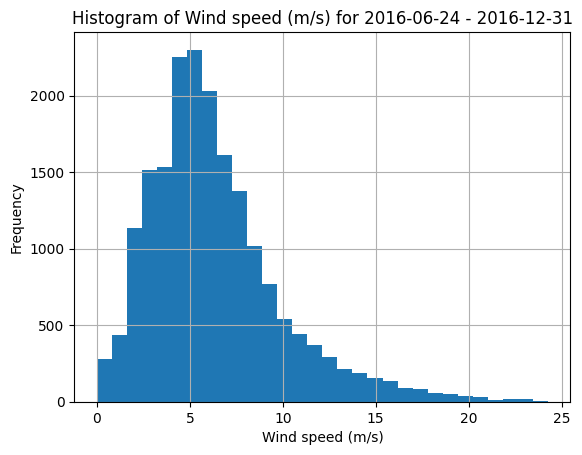

['Wind speed (m/s)']


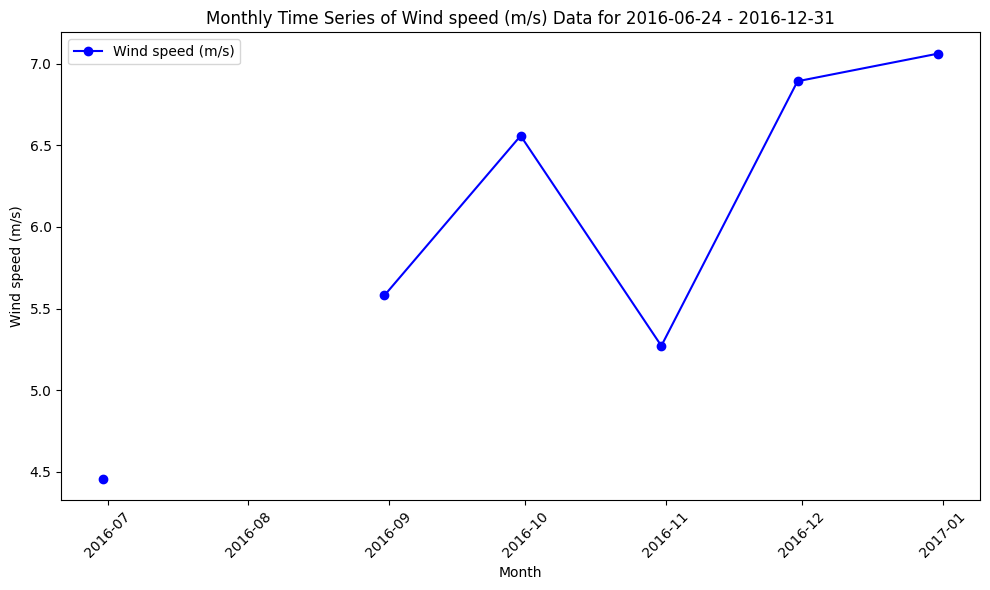


Plotting power data...
Plotting histogram for: Power (kW) for 2016-06-24 - 2016-12-31


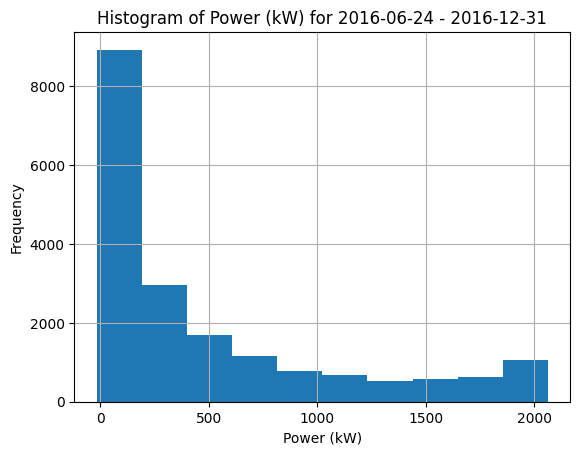


Plotting monthly time series of Power (kW) data for the time period 2016-06-24 - 2016-12-31:


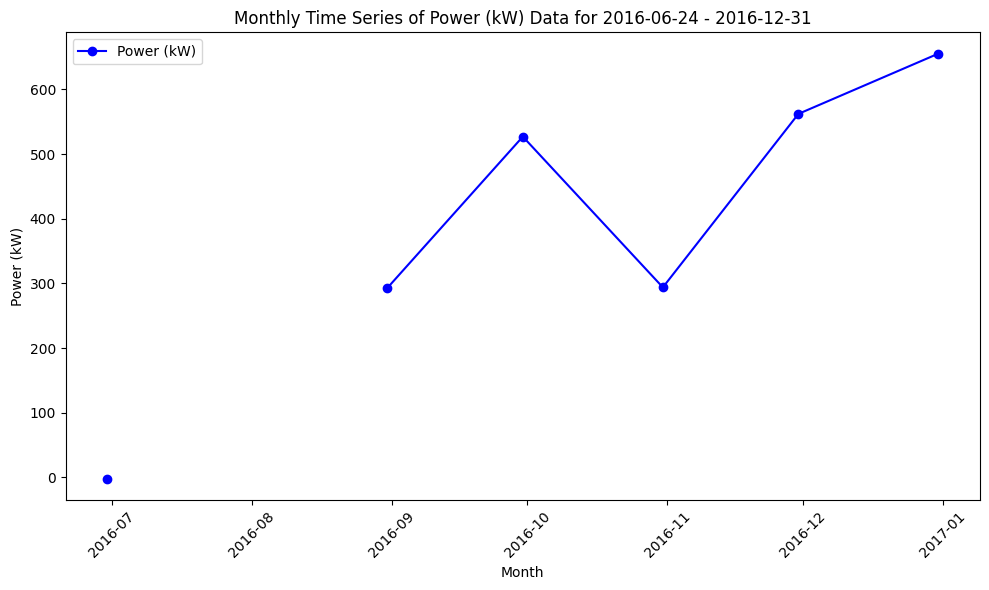

Filtered data for Power (kW) in 09/2018: 0 records found.
No data available for Power (kW) in 09/2018.


In [5]:
explorative_analysis(data_raw)

#### Custom Power Curve for Wind Turbine

This section is about a custom power curve for a wind turbine based on wind speed \( v \). The idea is to use the function 1- exp(-x) to model a function that grows from zero at x = 0 to a constant value at large x. Theoretically we expect power to grow like v**3 where v is the wind speed. To obtain a better fit, I actually use a polynomial of degree 3. Since the power starts first at a minimum wind speed, I use the variable v - v_cut to shift the curve to the right. In addition, the wind turbine stops if the wind speed is to large, 22 m/s in my case. The parameters of this function are then fitted to the theoretical power curve data published by the producer (pairs wind speed, power)

$$
P(v) = 
\begin{cases} 
    0, & \text{if } v \leq v_{\text{cut}} \text{ or } v > 22 \\ 
    \left(1 - \exp \left( -\left( \lambda_1 (v - v_{\text{cut}}) + \lambda_2 (v - v_{\text{cut}})^2 + \lambda_3 (v - v_{\text{cut}})^3 \right) \right) \right) \cdot 2050, & \text{if } v_{\text{cut}} < v \leq 22
\end{cases}
$$

where:

- $ v $ is the wind speed,
- $v_{\text{cut}} = 3.8$ m/s is the cut-in wind speed,
- $\lambda_1$, $\lambda_2$, and $\lambda_3$ are constants that shape the curve,
- The maximum power output is capped at 2050 kW.

Plotting the relationship between Wind Speed and Power by defining a custom power curve function and a function to fit it to wind power data, then plot the results.
This custom power curve function controls the shape of the power curve, which starts from zero at low speeds, increases, and approaches a maximum (2050 kW, the rated power) as wind speed rises.

Theoretical wind speed and power values from the producer

In [6]:
d = [
    [0, 0],
    [0.5, 0],
    [1, 0],
    [1.5, 0],
    [2, 0],
    [2.5, 0],
    [3, 0],
    [3.5, 0],
    [4, 55],
    [4.5, 110],
    [5, 186],
    [5.5, 264],
    [6, 342],
    [6.5, 424],
    [7, 506],
    [7.5, 618],
    [8, 730],
    [8.5, 865],
    [9, 999],
    [9.5, 1195],
    [10, 1391],
    [10.5, 1558],
    [11, 1724],
    [11.5, 1829],
    [12, 1909],
    [12.5, 1960],
    [13, 2002],
    [13.5, 2025],
    [14, 2044],
    [14.5, 2050],
    [15, 2050],
    [15.5, 2050],
    [16, 2050],
    [16.5, 2050],
    [17, 2050],
    [17.5, 2050],
    [18, 2050],
    [18.5, 2050],
    [19, 2050],
    [19.5, 2050],
    [20, 2050],
    [20.5, 2050],
    [21, 2050],
    [21.5, 2050],
    [22, 2050],
    [22.5, 0],
    [23, 0],
    [23.5, 0],
    [24, 0],
    [24.5, 0],
    [25, 0],
    [25.5, 0],
    [26, 0],
    [26.5, 0],
    [27, 0],
    [27.5, 0],
    [28, 0],
    [28.5, 0],
    [29, 0],
    [29.5, 0],
    [30, 0],
    [30.5, 0],
    [31, 0],
    [31.5, 0],
    [32, 0],
    [32.5, 0],
    [33, 0],
    [33.5, 0],
    [34, 0],
    [34.5, 0],
    [35, 0],
]


theoretical_producer_data = pd.DataFrame(d, columns=["wind_speed", "power"])

wind_speeds_theoretical = theoretical_producer_data["wind_speed"].values
power_output_theoretical = theoretical_producer_data["power"].values

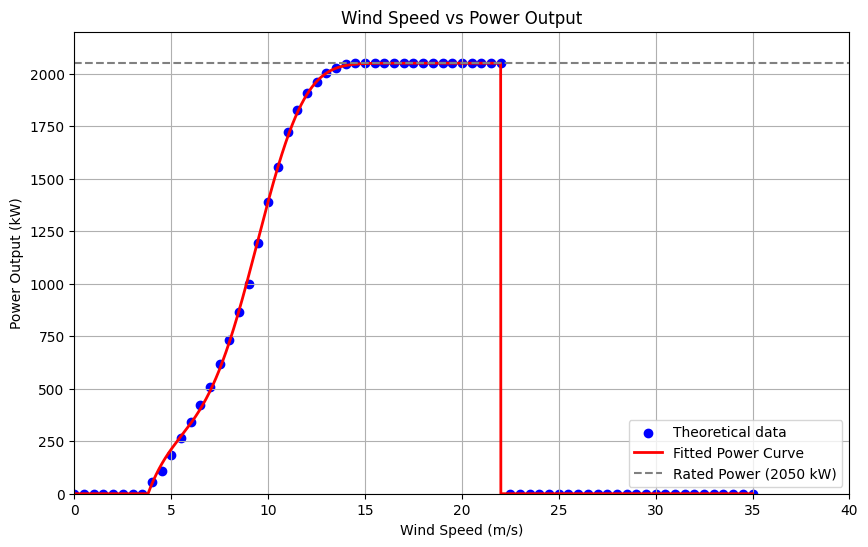

Fitted parameters:
λ1 = 0.12193998594391288, λ2 = -0.034322334838180014, λ3 = 0.007128044053741631


In [7]:
def custom_power_curve(v, lambda1, lambda2, lambda3):
    v_cut = 3.8
    return np.where(
        (v <= 3.8) | (v > 22),
        0,
        (
            1
            - np.exp(
                -(
                    lambda1 * (v - v_cut)
                    + lambda2 * (v - v_cut) ** 2
                    + lambda3 * (v - v_cut) ** 3
                )
            )
        )
        * 2050,
    )


# Fit the model to the data
initial_guess = [0.01, 0.01, 0.01]  # Initial guesses for lambda1, lambda2, lambda3
params, covariance = curve_fit(
    custom_power_curve, wind_speeds_theoretical, power_output_theoretical, p0=initial_guess
)

# Extract fitted parameters
lambda1_fitted, lambda2_fitted, lambda3_fitted = params

# Generate fitted power output
ws = np.arange(0, 35.001, 0.01)
fitted_power = custom_power_curve(ws, lambda1_fitted, lambda2_fitted, lambda3_fitted)

# Plotting the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(wind_speeds_theoretical, power_output_theoretical, color="blue", label="Theoretical data", marker="o")
plt.plot(ws, fitted_power, color="red", label="Fitted Power Curve", linewidth=2)
plt.title("Wind Speed vs Power Output")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power Output (kW)")
plt.xlim(0, max(wind_speeds_theoretical) + 5)  # Adjust x-limits for better view
plt.ylim(0, 2200)  # Adjust y-limits to encompass power range
plt.axhline(y=2050, color="grey", linestyle="--", label="Rated Power (2050 kW)")
plt.legend()
plt.grid()
plt.show()

# Print the fitted parameters
print("Fitted parameters:")
print(f"λ1 = {lambda1_fitted}, λ2 = {lambda2_fitted}, λ3 = {lambda3_fitted}")

Overlay of the theoretical power curve of the provider to all recorded Penmanshiel turbine data

In [8]:
power_var = 'Power (kW)'
event = 'Informational - System OK - System OK (32) - Full Performance'
#event = 'Warning - P output externally reduced - Warnings (27) - Partial Performance'
#power_var = 'Turbine Power setpoint (kW)'

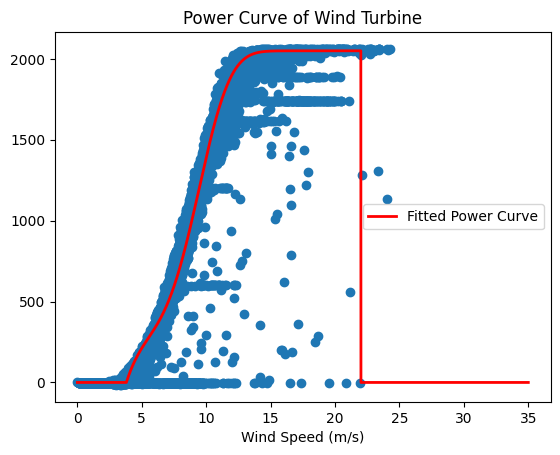

In [9]:
plt.plot(ws, fitted_power, label="Fitted Power Curve", linewidth=2, color='red')
plt.scatter(data_merged['Wind speed (m/s)'], data_merged[power_var])
# Adding title and axis labels
plt.title("Power Curve of Wind Turbine")  # Title above the graph
plt.xlabel("Wind Speed (m/s)")           # X-axis label
#plt.ylabel(f"{power_var}")                 # Y-axis label

# Optional: show the legend
plt.legend()

#plt.axhline(y=600, c='green', linestyle='--')
#plt.axvline(x=8, c='green', linestyle='--')
#plt.axvline(x=12, c='green', linestyle='--')

Same but for Status = Running and Event = 'Informational - System OK - System OK (32) - Full Performance'. For 2016 there are 2 major problems. One is the branch at around 1740 kW and the other one the many negative power values. Both will be investigated below

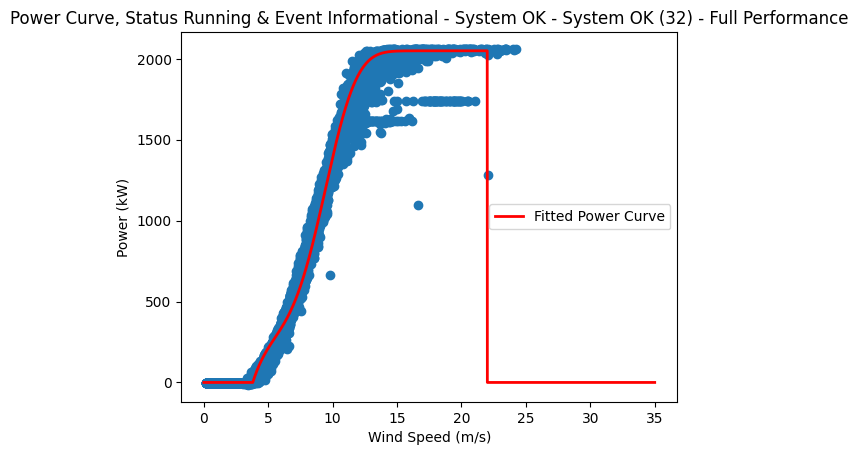

In [10]:
filtered_data = data_merged[(data_merged['Status'] == 'Running') & 
                             (data_merged['Events'] == event)]

# Plotting the filtered data
plt.plot(ws, fitted_power, label="Fitted Power Curve", linewidth=2, color='red')
plt.scatter(filtered_data['Wind speed (m/s)'], filtered_data[power_var])

# Adding title and axis labels
plt.title("Power Curve, Status Running & Event Informational - System OK - System OK (32) - Full Performance")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel(f"{power_var}")

# Show the legend
plt.legend()

Zoom into the branch at around 1740 kW

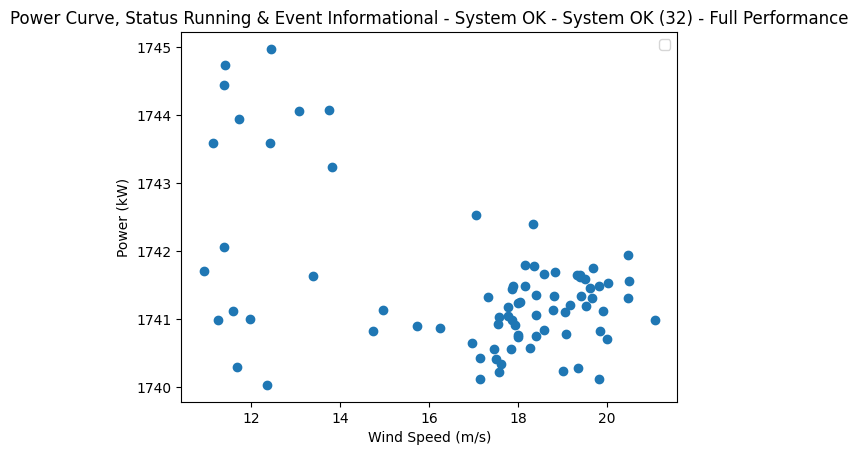

In [11]:
filtered_data_2 = filtered_data[(filtered_data['Power (kW)'] > 1740) & (filtered_data['Power (kW)'] < 1745)]

# Plotting the filtered data
#plt.plot(ws, fitted_power, label="Fitted Power Curve", linewidth=2, color='red')
plt.scatter(filtered_data_2['Wind speed (m/s)'], filtered_data_2[power_var])

# Adding title and axis labels
plt.title("Power Curve, Status Running & Event Informational - System OK - System OK (32) - Full Performance")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel(f"{power_var}")

# Show the legend
plt.legend()




In [12]:
pd.set_option('display.max_columns', None)
low_speed_df = filtered_data_2[filtered_data_2['Wind speed (m/s)'] < 14]
high_speed_df = filtered_data_2[filtered_data_2['Wind speed (m/s)'] > 14]
low_speed_stats = low_speed_df.describe()
high_speed_stats = high_speed_df.describe()

print(low_speed_df.index.unique())
print(high_speed_df.index.unique())



#print(high_speed_df.index.min())
#print(high_speed_df.index.max())



## huge difference for the variables "Power, Standard deviation (kW)", "Lost Production to Performance (kWh)"
selected_columns = ["Power, Standard deviation (kW)", "Lost Production to Performance (kWh)"]
comparison = low_speed_stats.compare(high_speed_stats)

# Display only the selected columns in the comparison
display(comparison[selected_columns])

DatetimeIndex(['2016-10-17 12:40:00', '2016-11-10 14:20:00',
               '2016-11-10 14:30:00', '2016-11-10 14:50:00',
               '2016-11-10 15:00:00', '2016-11-21 19:50:00',
               '2016-11-22 19:20:00', '2016-12-07 04:30:00',
               '2016-12-07 07:30:00', '2016-12-07 19:00:00',
               '2016-12-20 18:00:00', '2016-12-22 12:20:00',
               '2016-12-23 08:40:00', '2016-12-24 08:40:00',
               '2016-12-26 03:00:00', '2016-12-31 12:00:00',
               '2016-12-31 14:40:00'],
              dtype='datetime64[ns]', name='time', freq=None)
DatetimeIndex(['2016-11-04 21:50:00', '2016-11-04 22:00:00',
               '2016-11-04 22:10:00', '2016-11-04 22:20:00',
               '2016-11-04 22:30:00', '2016-11-04 22:40:00',
               '2016-11-04 22:50:00', '2016-11-04 23:00:00',
               '2016-11-04 23:10:00', '2016-11-04 23:20:00',
               '2016-11-04 23:30:00', '2016-11-04 23:40:00',
               '2016-11-04 23:50:00', '2016-1

Power, Standard deviation (kW)             \
                                self      other   
count                      17.000000  63.000000   
mean                      231.355297  18.003968   
std                       131.303230   2.134330   
min                        11.710000  12.670000   
25%                       180.190002  16.540000   
50%                       297.510010  18.110001   
75%                       320.929993  19.435000   
max                       348.380005  24.309999   

      Lost Production to Performance (kWh)             
                                      self      other  
count                            17.000000  63.000000  
mean                              3.952271  24.024467  
std                              11.755998   2.306806  
min                             -12.887776  10.833409  
25%                              -5.029919  24.390826  
50%                               2.777081  24.450010  
75%                              10.772973  24.519997  
max                              27.555669  24.630002

#### The branch in the plot (deviation from the theoretical power curve) at Power 1741 kW are all but 2 events from 1 night 04.11.2016 - 05.11.2016. At 08:00 am on 05.11.2016 there is a warning message "Warning, 9000, P output externally reduced". Most likely the warning was issued 10 hours and 10 min late. This allows us to exclude these data points

investigate the other power variables. None seem to be useful except 'Potential power default PC (kW)' which turnns out to be really the theoretical power output of the wind turbine provider

In [13]:
#p_theoretical = 'Potential power default PC (kW)' # is very close
#p_theoretical = 'Potential power learned PC (kW)' # is not so good, has 2 branches
p_theoretical = 'Potential power reference turbines (kW)' # is not so good[
#p_theoretical = 'Potential power met mast anemometer (kW)' # is empty
#p_theoretical = 'Potential power primary reference turbines (kW)' # is not so good
#p_theoretical = 'Potential power estimated (kW)' # is empty

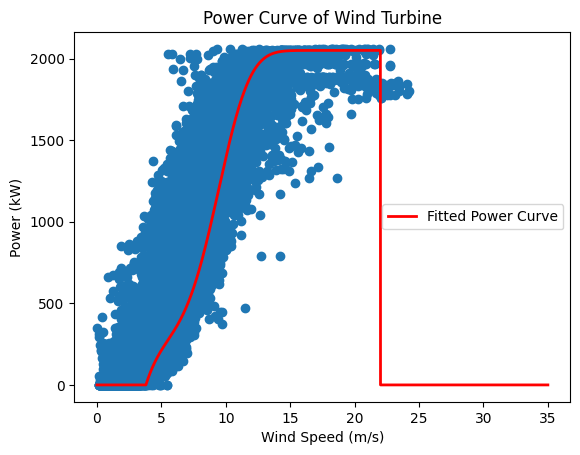

In [14]:
plt.plot(ws, fitted_power, label="Fitted Power Curve", linewidth=2, color='red')
plt.scatter(data_merged['Wind speed (m/s)'], data_merged[p_theoretical])
# Adding title and axis labels
plt.title("Power Curve of Wind Turbine")  # Title above the graph
plt.xlabel("Wind Speed (m/s)")           # X-axis label
plt.ylabel("Power (kW)")                 # Y-axis label

# Optional: show the legend
plt.legend()

#plt.axhline(y=600, c='green', linestyle='--')
#plt.axvline(x=8, c='green', linestyle='--')
#plt.axvline(x=12, c='green', linestyle='--')

At times where Status = Running and it is running at full performance, there is still 2221 cases where negative power is produced

In [15]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(data_merged[(data_merged['Power (kW)'] < 0) & (data_merged['Status'] == 'Running')]['Events'].value_counts())


,count
Events,
Informational - System OK - System OK (32) - Full Performance,2221
Warning - P output externally reduced - Warnings (27) - Partial Performance,1102
Informational - System OK - System OK (32) - Full Performance | Informational - Wind < start wind - External stop (low wind speed) (5) - Out of Environmental Specification | Informational - System OK - System OK (32) - Full Performance,142
Warning - P output externally reduced - Warnings (27) - Partial Performance | Informational - Wind < start wind - External stop (low wind speed) (5) - Out of Environmental Specification,109
Warning - Time sync. failed (SNTP error) - Warnings (27) - Full Performance,33
Informational - Wind < start wind - External stop (low wind speed) (5) - Out of Environmental Specification | Informational - System OK - System OK (32) - Full Performance,17
Informational - System OK - System OK (32) - Full Performance | Informational - Absence of wind during run-up - Operating states (28) - Out of Environmental Specification | Informational - System OK - System OK (32) - Full Performance,6
Informational - System OK - System OK (32) - Full Performance | Informational - Wind < start wind - External stop (low wind speed) (5) - Out of Environmental Specification,4
Warning - Time sync. failed (SNTP error) - Warnings (27) - Full Performance | Informational - Wind < start wind - External stop (low wind speed) (5) - Out of Environmental Specification,3


Explorative Analysis of the suspicious entries for full operation in particular the negative power entries

In [16]:
standard_case = data_merged[data_merged['Events'] == 'Informational - System OK - System OK (32) - Full Performance']

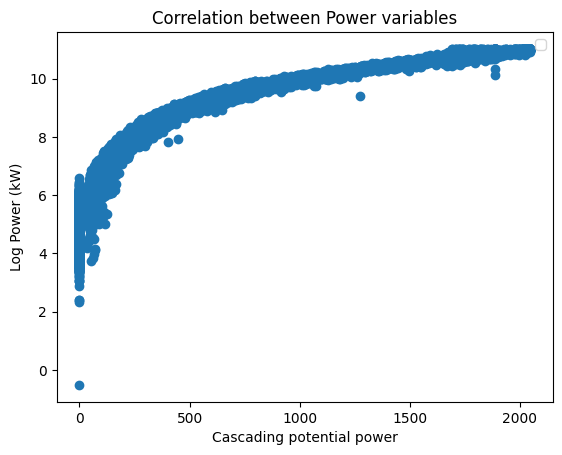

In [17]:
#plt.plot(ws, fitted_power, label="Fitted Power Curve", linewidth=2, color='red')
plt.scatter(standard_case['Cascading potential power (kW)'], np.log2(standard_case['Power (kW)'] + 16))
# Adding title and axis labels
plt.title("Correlation between Power variables")  # Title above the graph
plt.xlabel("Cascading potential power")           # X-axis label
plt.ylabel("Log Power (kW)")                 # Y-axis label

# Optional: show the legend
plt.legend()

#plt.axhline(y=600, c='green', linestyle='--')
#plt.axvline(x=8, c='green', linestyle='--')
#plt.axvline(x=12, c='green', linestyle='--')

Attempt to use "Lost production"

- Lost production > 0 is <=> Status = Stop or Lost production = 0 <=> Status = Running

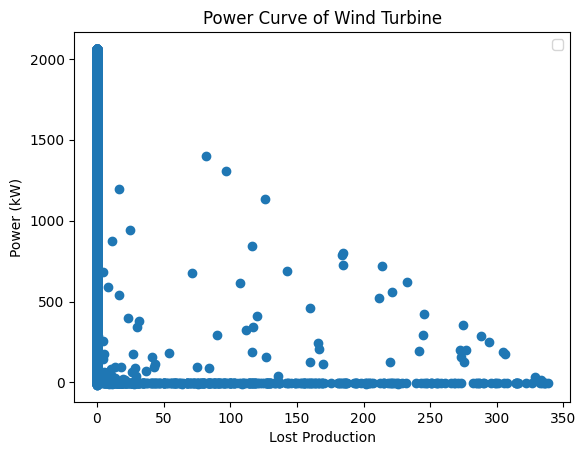

In [18]:
#plt.plot(ws, fitted_power, label="Fitted Power Curve", linewidth=2, color='red')
plt.scatter(data_merged['Lost Production to Downtime and Curtailment Total (kWh)'], data_merged['Power (kW)'])
# Adding title and axis labels
plt.title("Power Curve of Wind Turbine")  # Title above the graph
plt.xlabel("Lost Production")           # X-axis label
plt.ylabel("Power (kW)")                 # Y-axis label

# Optional: show the legend
plt.legend()

#plt.axhline(y=600, c='green', linestyle='--')
#plt.axvline(x=8, c='green', linestyle='--')
#plt.axvline(x=12, c='green', linestyle='--')

Create a new table with 2 extra columns: 1. log power, 2. percentage deviation of power from theoretical power

In [19]:
turbine_log_powers = data_merged.copy()
turbine_log_powers['Log Power'] = np.log2(turbine_log_powers["Power (kW)"] + 16)

In [20]:
turbine_log_powers["Potential power default PC (kW)"].min()

np.float64(0.0)

In [21]:
turbine_log_powers["pow_deviation"] = abs(turbine_log_powers["Power (kW)"] / (0.1 + turbine_log_powers["Potential power default PC (kW)"]) - 1)

Filter for full operation

In [22]:
events_df = turbine_log_powers[turbine_log_powers['Events'] == event]

In [23]:
rest_df = turbine_log_powers[(turbine_log_powers["pow_deviation"] > 0.2) & 
                              (turbine_log_powers['Events'] == event)] 
                              #(turbine_log_powers['Wind speed (m/s)'] >= 10) & 
                              #(turbine_log_powers['Lost Production to Performance (kWh)'] > 0)

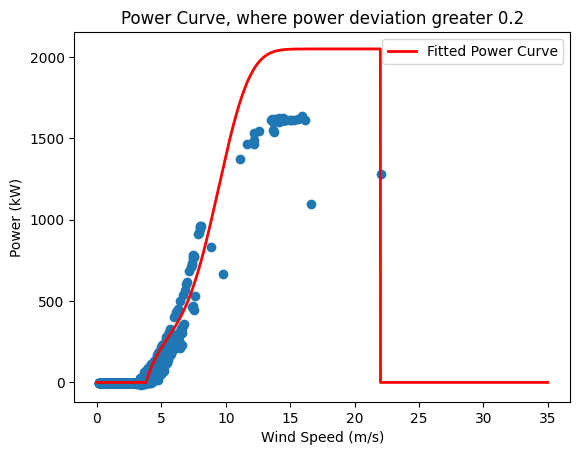

In [24]:
plt.plot(ws, fitted_power, label="Fitted Power Curve", linewidth=2, color='red')
plt.scatter(rest_df['Wind speed (m/s)'], rest_df["Power (kW)"])

# Adding title and axis labels
plt.title("Power Curve, where power deviation greater 0.2")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power (kW)")

# Show the legend
plt.legend()

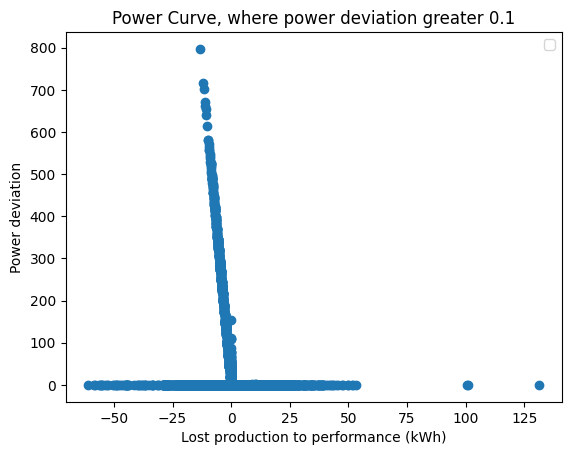

In [25]:
plt.scatter(events_df["Lost Production to Performance (kWh)"], events_df['pow_deviation'])

# Adding title and axis labels
plt.title("Power Curve, where power deviation greater 0.1")
plt.ylabel("Power deviation")
plt.xlabel("Lost production to performance (kWh)")

# Show the legend
plt.legend()

### The lost production to performance variable: if positive power is lost hence the data points in the power curve are to the right of the theoretical curve. If negative the data points are to the left. Interestlingly, the biggest deviation from the theoretical curve occur for a lost production to performance from zero to slightly negative

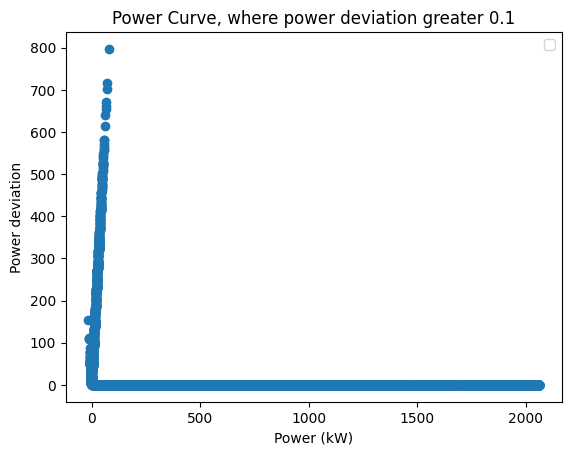

In [26]:
plt.scatter(events_df["Power (kW)"], events_df['pow_deviation'])

# Adding title and axis labels
plt.title("Power Curve, where power deviation greater 0.1")
plt.ylabel("Power deviation")
plt.xlabel("Power (kW)")

# Show the legend
plt.legend()

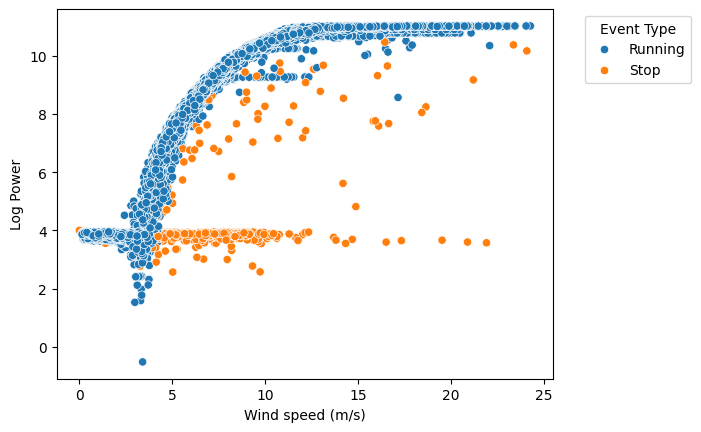

In [27]:
import seaborn as sns
# Count the occurrences of each event type

#event_counts = data_2016_electricity['Status'].value_counts()

# Choose the top N most frequent events
#top_events = event_counts.iloc[3:9].index  # Change '5' to however many events you want to display

# Filter the dataset to only include these top events
#filtered_data = data_2016_electricity[data_2016_electricity['Events'].isin(top_events)]

# Scatter plot
sns.scatterplot(x=turbine_log_powers['Wind speed (m/s)'], 
                y=turbine_log_powers['Log Power'], 
                hue=turbine_log_powers['Status'],
                )  # Optional: use a color palette

# Adjust legend
plt.legend(title="Event Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

In [28]:
problematic = turbine_2016.loc[(turbine_2016['Wind speed (m/s)'] < 12) & 
                     (turbine_2016['Wind speed (m/s)'] > 8) & 
                     (turbine_2016['Power (kW)'] <= 610) &
                     (turbine_2016['Power (kW)'] >= 600),:]

NameError: name 'turbine_2016' is not defined

array([[<Axes: title={'center': 'Wind speed (m/s)'}>,
        <Axes: title={'center': 'Power (kW)'}>]], dtype=object)

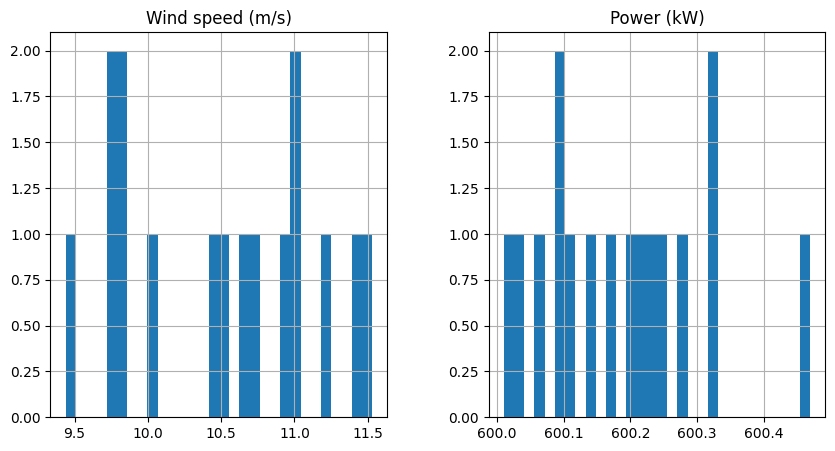

In [ ]:
problematic[['Wind speed (m/s)', 'Power (kW)']].hist(bins=30, figsize=(10, 5))

### Analysis of Merged Datasets

#### Frequency count of events

In [ ]:
status_running = data_2016_electricity[data_2016_electricity['Status'] == 'Running']
# Frequency of "Events" Combinations for Status = Running
running_event_counts = status_running['Events'].value_counts()
pd.DataFrame(running_event_counts)

,count
Events,
Informational - System OK - System OK (32) - Full Performance,11578
Warning - P output externally reduced - Warnings (27) - Partial Performance,5615
Informational - Parameterized P red. - Operating states (28) - | Warning - P output externally reduced - Warnings (27) - Partial Performance,293
Warning - Time sync. failed (SNTP error) - Warnings (27) - Full Performance,284
Informational - System OK - System OK (32) - Full Performance | Informational - Wind < start wind - External stop (low wind speed) (5) - Out of Environmental Specification | Informational - System OK - System OK (32) - Full Performance,266
Warning - P output externally reduced - Warnings (27) - Partial Performance | Informational - Wind < start wind - External stop (low wind speed) (5) - Out of Environmental Specification,194
Informational - Wind < start wind - External stop (low wind speed) (5) - Out of Environmental Specification | Informational - System OK - System OK (32) - Full Performance,25
Informational - System OK - System OK (32) - Full Performance | Informational - Wind < start wind - External stop (low wind speed) (5) - Out of Environmental Specification,25
Warning - P output externally reduced - Warnings (27) - Partial Performance | Warning - Error brake resistor CHP - Warnings (27) - Full Performance,12


#### Relationship between Wind Speed and Power Output with Event Categories

In [ ]:
data_2016_electricity.loc[~data_2016_electricity.Events.fillna("").str.startswith("Informational - System OK"), :]

,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),...,"Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)",Events,Status
time,,,,,,,,,,,,,,,,,,,,,
2016-06-24 11:40:00,0.00,0.00,0.00,0.00,5.8,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,0.00,0.00,0.00,NaN,NaN,Informational - Overfrequency - Warnings (27) - | Stop - Manual brake - Manual stop (service) (9) - Scheduled Maintenance | Warning - Overload gear bypass filter - Warnings (27) - | Informational - Cable panel breaker open - Warnings (27) - | Informational - Supply circuit breaker earthed - Warnings (27) - Full Performance | Warning - Overload transformer fan outlet air - Warnings (27) - Full Performance | Warning - Overload transf. fan inlet air - Warnings (27) - | Warning - Overload generator fan 2 - Warnings (27) - Forced outage | Warning - Overload generator fan 3 - Warnings (27) - Forced outage | Warning - Overload generator fan 1 - Warnings (27) - Forced outage | Warning - Error brake resistor CHP - Warnings (27) - Full Performance | Warning - Error lubrication pump pitch - Warnings (27) - | Warning - No assignment to a PMU - Warnings (27) - | Warning - Battery charge cycle axis 1 error - Warnings (27) - | Warning - Battery charge cycle axis 2 error - Warnings (27) - | Warning - Battery charge cycle axis 3 error - Warnings (27) - | Informational - Parameterized P red. - Operating states (28) -,Stop
2016-06-24 11:50:00,5.45,0.64,2.74,6.91,5.8,5.55,0.67,2.67,6.99,5.36,...,NaN,NaN,NaN,0.58,0.28,0.05,NaN,NaN,Stop - Manual brake - Manual stop (service) (9) - Scheduled Maintenance | Warning - Overload gear bypass filter - Warnings (27) - | Informational - Cable panel breaker open - Warnings (27) - | Informational - Supply circuit breaker earthed - Warnings (27) - Full Performance | Warning - Overload transf. fan inlet air - Warnings (27) - | Warning - Overload generator fan 2 - Warnings (27) - Forced outage | Warning - Overload generator fan 3 - Warnings (27) - Forced outage | Warning - Overload generator fan 1 - Warnings (27) - Forced outage | Warning - Error lubrication pump pitch - Warnings (27) - | Warning - Battery charge cycle axis 1 error - Warnings (27) - | Warning - Battery charge cycle axis 2 error - Warnings (27) - | Warning - Battery charge cycle axis 3 error - Warnings (27) - | Informational - Parameterized P red. - Operating states (28) - | Warning - Service obstacle light - Warnings (27) - | Warning - Breakdown obstacle light - Warnings (27) - | Informational - Overfrequency - Warnings (27) -,Stop
2016-06-24 12:00:00,4.51,1.08,1.84,6.28,5.8,4.61,1.12,1.84,6.43,4.42,...,NaN,NaN,NaN,0.56,0.29,0.05,NaN,NaN,Stop - Manual brake - Manual stop (service) (9) - Scheduled Maintenance | Warning - Overload gear bypass filter - Warnings (27) - | Informational - Cable panel breaker open - Warnings (27) - | Informational - Supply circuit breaker earthed - Warnings (27) - Full Performance | Warning - Overload transf. fan inlet air - Warnings (27) - | Warning - Overload generator fan 2 - Warnings (27) - Forced outage | Warning - Overload generator fan 3 - Warnings (27) - Forced outage | Warning - Overload generator fan 1 - Warnings (27) - Forced outage | Warning - Error lubrication pump pitch - Warnings (27) - | Warning - Battery charge cycle axis 1 error - Warnings (27) - | Warning - Battery charge cycle axis 2 error - Warnings (27) - | Warning - Battery charge cycle axis 3 error - Warnings (27) - | Informational - Parameterized P red. - Operating states (28) - | Warning - 

In [ ]:
import seaborn as sns
# Count the occurrences of each event type

event_counts = data_2016_electricity['Events'].value_counts()

# Choose the top N most frequent events
top_events = event_counts.iloc[3:9].index  # Change '5' to however many events you want to display

# Filter the dataset to only include these top events
filtered_data = data_2016_electricity[data_2016_electricity['Events'].isin(top_events)]

# Scatter plot
sns.scatterplot(x=filtered_data['Wind speed (m/s)'], 
                y=filtered_data['Power (kW)'], 
                hue=filtered_data['Events'],
                )  # Optional: use a color palette

# Adjust legend
plt.legend(title="Event Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

#### Old

In [ ]:
sns.scatterplot(x=data_2016_electricity['Wind speed (m/s)'], y=data_2016_electricity['Power (kW)'], hue=data_2016_electricity['Events'])
# Customize legend with line breaks
handles, labels = plt.gca().get_legend_handles_labels()

# Manually replace long labels with ones that include line breaks
labels = [label.replace("Very long event name", "Very\nlong event name") for label in labels]

# Set the new labels and improve the layout
plt.legend(handles, labels, title="Event Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

#### Relationship between Wind Speed and Log Power of entire merged dataset 

In [ ]:
turbine_log_powers = data_2016_electricity.copy()
turbine_log_powers['Log Power'] = np.log2(turbine_log_powers["Power (kW)"] + 16)

In [ ]:
turbine_log_powers[turbine_log_powers['Events'].str.strip() == 'Warning - Time sync. failed (SNTP error) - Warnings (27) - Full Performance'.strip()]


#### Alt

In [ ]:
condition1 = turbine_log_powers['Lost Production to Downtime and Curtailment Total (kWh)'] > 0
condition2 = turbine_log_powers['Status'] == 'Stop'

In [ ]:
Events = [
    'Informational - System OK - System OK (32) - Full Performance',
    'Warning - P output externally reduced - Warnings (27) - Partial Performance',
    'Warning - Time sync. failed (SNTP error) - Warnings (27) - Full Performance',
    'Informational - Parameterized P red. - Operating states (28) - | Warning - P output externally reduced - Warnings (27) - Partial Performance'
]

for i in range(0, len(Events)):
    print("Filtering for:", Events[i].strip())
    # Filter rows where the 'Events' column matches any value in the Events list
    #display(pd.DataFrame(turbine_log_powers[turbine_log_powers['Events'].str.strip() == Events[i].strip()]))
    #display(turbine_log_powers.loc[turbine_log_powers.Events.str.contains(Events[i]).fillna(False), :])
    display(turbine_log_powers.loc[turbine_log_powers.Events.fillna('').str.startswith('Informational - Parameterized P red. - Operating states \(28'), :])
    

In [ ]:
condition = event_condition[0]
plt.scatter(turbine_log_powers['Wind speed (m/s)'], turbine_log_powers['Log Power'])
plt.title("Relationship wind speed vs log power")
plt.xlabel("Wind speed (m/s)")
plt.ylabel("Log Power (kW)")
plt.axhline(y=4, c="red")
plt.axvline(x=3.5, c="red")
highlighted_points = turbine_log_powers[condition]
plt.scatter(highlighted_points['Wind speed (m/s)'], highlighted_points['Log Power'], color="orange", label="Highlighted points")

In [ ]:
plt.scatter(turbine_log_powers['Wind speed (m/s)'], turbine_log_powers['Log Power'])
plt.title("Relationship wind speed vs log power")
plt.xlabel("Wind speed (m/s)")
plt.ylabel("Log Power (kW)")
plt.axhline(y=4, c="red")
plt.axvline(x=3.5, c="red")
highlighted_points = turbine_log_powers[condition2]
plt.scatter(highlighted_points['Wind speed (m/s)'], highlighted_points['Log Power'], color="orange", label="Highlighted points")

#### Relationship between Wind Speed and Log Power of entire merged dataset for Status = Running

In [ ]:
merged_status_running = turbine_log_powers[turbine_log_powers["Status"] == "Running"]
plt.scatter(merged_status_running['Wind speed (m/s)'], np.log2(merged_status_running["Power (kW)"] + 16)) # log2(x + 16) = 4 for x=0 since 2^4 = 16
plt.axhline(y=4, c="red")
plt.axvline(x=3.5, c="red")
plt.xlabel("Wind speed (m/s)")
plt.ylabel("Log Power (kW)")
plt.title("Relationship wind speed vs log power for Status = Running")
plt.annotate("Power = 0", [10, 4.5])